# Линейная регрессия (продолжение).

# Задание 1

Поработаем с датасетом Бостон.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
%pylab inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Populating the interactive namespace from numpy and matplotlib


C:\Users\kzolo\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X_full = data.data
y_full = data.target

Посмотрите на качество линейной регрессии (из sklearn) на кросс-валидации.

In [9]:
from sklearn.model_selection import cross_val_score

cross_val_score(LinearRegression(), X_full, y_full, cv=3,scoring='r2').mean()

-1.5841985220996833

Разбейте данные на train и test. Обучите линейную регрессию на train и сделайте предсказание на train и test.

Выведите MSE на train и на test.

In [23]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_full, y_full, test_size=0.25,random_state=4)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model=LinearRegression()
model.fit(Xtrain, ytrain) 


LinearRegression()

In [25]:
print(model.coef_)
print(model.intercept_)

[-1.18901558e-01  5.05689401e-02 -1.07427433e-02  3.66184857e+00
 -1.52957329e+01  3.39316181e+00 -5.91222130e-03 -1.49234402e+00
  3.33696220e-01 -1.50593743e-02 -8.69475207e-01  8.80571095e-03
 -4.92763225e-01]
37.510036197921764


In [26]:
from sklearn.metrics import r2_score
pred_test = model.predict(Xtest)

r2_score(ytest,pred_test) ** 0.5

0.855208543172272

In [27]:
pred_train = model.predict(Xtrain)
r2_score(ytrain,pred_train) ** 0.5

0.8587914194632126

Нарисуем матрицу корреляций признаков.

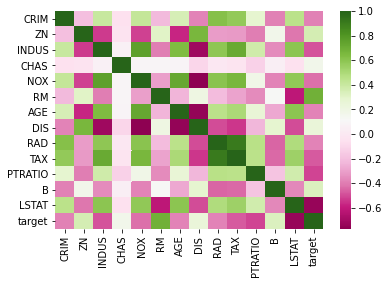

In [28]:
import seaborn as sns

data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])

corr = data1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="PiYG")

Посмотрим на значение коэффициентов корреляции признаков с таргетом.

In [ ]:
data1[data1.columns[1:]].corr()['target'][:-1]

In [ ]:
y = data1['target']

X = data1.drop('target', axis=1)

Попробуйте убрать из данных признаки с наименьшей корреляцией с target (1, 2 или 3 признака) и обучить линейную регрессию на оставшихся признаках. Как изменилось качество?

In [ ]:
#your code here

Послевательно добавляйте новые признаки, после каждого шага смотрите, как изменилось качество модели на кросс-валидации:
    
    * квадрат признака, имеющего наибольшую по модулю корреляцию с таргетом
    * произведение двух признаков, имеющих наибольшую по модулю корреляцию с таргетом

In [ ]:
#your code here

# Задание 2

Поработайте с датасетом affairs. Предскажите значение в колонке affairs по остальным факторам.

1. Сначала проведите разведочный анализ, а именно, исследуйте зависимость таргета от каждого фактора (или пары факторов).

2. Обучите линейную регрессию, посмотрите на качество на кросс-валидации, затем разбейте данные на train и test,
обучите алгоритм на train и сделайте предсказания на train и test, выведите ошибки.

3. Посмотрите на матрицу корреляций факторов и целевой переменной. 
Если есть пары сильно коррелирующих между собой факторов, удалите один из пары.

Если есть факторы, слабо коррелирующие с таргетом, удалите их.

Заново обучите алгоритм на обновленных данных. Как изменилось его качество?

In [ ]:
#your code here

# Задание 3 

Примените линейную регрессию к данным, сгенерированным ниже. Какая получилась ошибка? Как улучшить модель?

In [ ]:
num_points = 100
m, b, delta = 10, 0, 50

x = np.array([random.uniform(1,9) for i in range(num_points)])
y = np.array([random.uniform(m*x*x+b-delta,m*x*x+b+delta) for x in x])

plt.scatter(x,y)

In [ ]:
#your code here